In [46]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [47]:
import matplotlib.pyplot as plt

In [48]:
%matplotlib inline

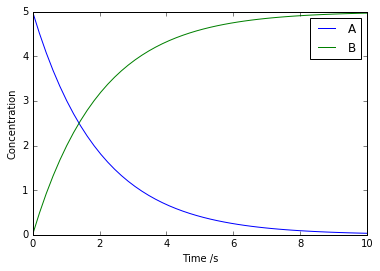

In [49]:
#A->B
#d[A]/dt = k1[A]

def dA(A,t,k):
    return -k*A

def A(t, k, A0):
    """
    Solution to the ODE A'(t) = f(A,k,A0) with initial condition A(0) = A0
    """
    y = odeint(dA, A0, t, args=(k,))
    return y.ravel()

def B(t, k, A0):
    y = odeint(dA, A0, t, args=(k,))
    return A0 -y.ravel()

t = np.linspace(0,10)
A0 = 5
k = 0.5

plt.plot(t, A(t,k,A0), label='A')
plt.plot(t, B(t,k,A0), label='B')

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [50]:
all(A(t,k,A0) - A0*np.e**(-k*t) < 1e-06)

True

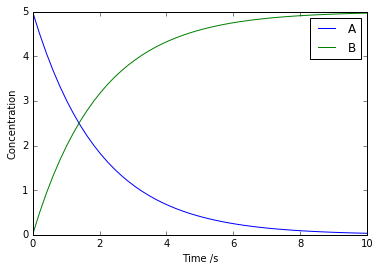

In [51]:
#A->B->C
#d[A]/dt = -k1[A]
#d[B]/dt = k1[A] - k2[B]

def dX(X,t,k):
    return k.dot(X)

def X(t,k,X0):
    """
    Solution to the ODE X'(t) = f(X,k,A0) with initial condition A(0) = A0
    """
    y = odeint(dX, X0, t, args=(k,))
    return y


t = np.linspace(0,10)
X0 = np.array([5,0,0])

k1,k2 = 0.5,0.000001
k = np.array([[-k1, 0,  0],
              [k1, -k2, 0],
              [0,   k2, 0]])

plt.plot(t, X(t,k,X0).T[0], label='A')
plt.plot(t, X(t,k,X0).T[1], label='B')

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

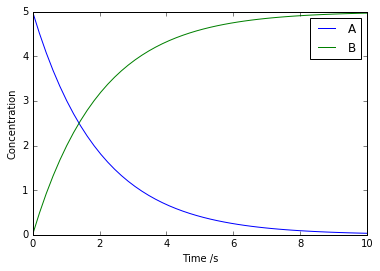

In [52]:
#general formulation
#connectivity of reaction scheme given by k
#initial concs given by X0

def dX(X,t,k):
    return k.dot(X)

def X(t,k,X0):
    """
    Solution to the ODE X'(t) = f(X,k,A0) with initial condition A(0) = A0
    """
    y = odeint(dX, X0, t, args=(k,))
    return y


t = np.linspace(0,10)
X0 = np.array([5,0,])

k1 = 0.5
k = np.array([[-k1, 0],
              [ k1, 0]])

plt.plot(t, X(t,k,X0).T[0], label='A')
plt.plot(t, X(t,k,X0).T[1], label='B')

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [53]:
all(X(t,k,X0).T[0]  - X0[0]*np.e**(-k1*t) < 1e-08)

True

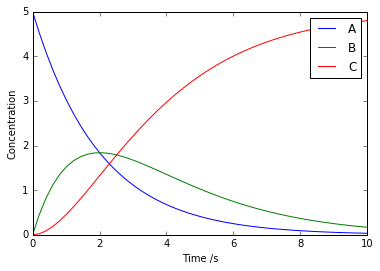

In [54]:
#A->B->C
#d[A]/dt = -k1[A]
#d[B]/dt = k1[A] - k2[B]
#d[C]/dt = k2[b]

def dX(X,t,k):
    return k.dot(X)

def X(t,k,X0):
    """
    Solution to the ODE X'(t) = f(X,k,A0) with initial condition A(0) = A0
    """
    y = odeint(dX, X0, t, args=(k,))
    return y


t = np.linspace(0,10)
X0 = np.array([5,0,0])

k1 = 0.5
k2 = 0.5
k = np.array([[-k1,  0,  0],
              [ k1, -k2, 0],
              [ 0,   k2, 0 ]])

plt.plot(t, X(t,k,X0).T[0], label='A')
plt.plot(t, X(t,k,X0).T[1], label='B')
plt.plot(t, X(t,k,X0).T[2], label='C')

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

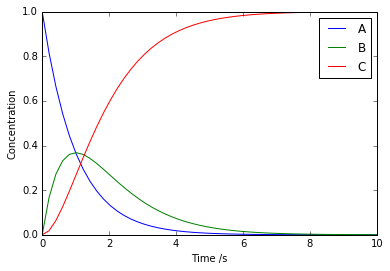

In [55]:
#A->B->C
#d[A]/dt = -k1[A]
#d[B]/dt = k1[A] - k2[B]
#d[C]/dt = k2[b]


def dX(X,t,k):
    return k.dot(X)

def X(t,k,X0):
    """
    Solution to the ODE X'(t) = f(X,k,A0) with initial condition A(0) = A0
    """
    y = odeint(dX, X0, t, args=(k,))
    return y

def K(ks, connectivity):
    """
    Converts a matrix of connectivities defining the reactions and a list of rate constants 
    to the k matrix.
    
    Connectivity matrix:
           rows represent reactants
           columns represent products
    
    k matrix:
            rows represent rate of change of species
            columns represent concentrations of species 
            
                        k1   k2
    Example reaction: A -> B -> C
    
            d[A]/dt = -k1[A]
            d[B]/dt =  k1[A] - k2[B]
            d[C]/dt =  k2[B]

    
    connectivity = np.array([[0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0]])
   
    ks = np.array([1, 1])
    k1,k2 = ks

    k = np.array([[-k1,  0,  0],
                  [ k1, -k2, 0],
                  [ 0,   k2, 0 ]])

    """
    
    connectivity = connectivity.astype(np.float64)
    rxn_locs = np.nonzero(connectivity)
    assert len(ks) == len(rxn_locs)


    connectivity[rxn_locs] = ks

    #negative diagonal
    k_diag = -connectivity.sum(axis=1)
    #positive off-diagonal
    k =  connectivity.T.copy()

    #building the final k matrix
    k[np.diag_indices_from(k)] = k_diag
    return k


#time values
t = np.linspace(0,10)

# we specify the connectivity with a matrix defining the reactions 
# rows represent reactant species
# columns represent product species

connectivity = np.array([[0, 1, 0],
                         [0, 0, 1],
                         [0, 0,  0]])
ks = np.array([1,1])

k = K(ks, connectivity)
no_components = k.shape[0]

#initial concentrations
X0 = np.zeros(no_components)
X0[0] = 1

concs = X(t,k,X0).T


species='ABCDEFGHIJKLMOPQRSTUVQXYZ'
for l,x in zip(species,concs):
    plt.plot(t,x, label=l)

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [56]:
def sim_concs(t, n, *params):
    params = np.array(params)
    connectivity = params[:n**2].reshape([n,n])

    n_ks = len(np.nonzero(connectivity))
    ks = params[n**2:n**2+n_ks]

    k = K(ks,connectivity)
    no_components = k.shape[0]
    
    X0 = np.zeros(no_components)
    X0[0] = 1

    return X(t,k,X0).T

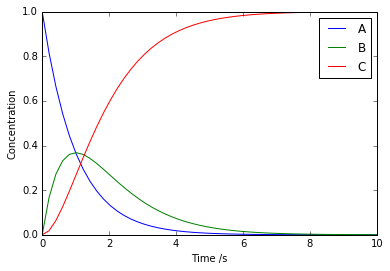

In [57]:
ks = np.array([1,1])
connectivity = np.array([[0, 1, 0],
                         [0, 0, 1],
                         [0, 0,  0]])

t = np.linspace(0,10)

params = list(connectivity.ravel()) + list(ks)
concs = sim_concs(t,3,*params)

species='ABCDEFGHIJKLMOPQRSTUVQXYZ'
for l,x in zip(species,concs):
    plt.plot(t,x, label=l)

plt.xlabel('Time /s')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [58]:
from scipy.optimize import curve_fit

class Kinetics_Fit(object):
    def __init__(self, connectivity, t, traces, wavelengths=None, species=None, 
                       guess_ks=None, guess_x0=None, guess_abs=None):

        self.connectivity = connectivity.astype(np.float64) 
        self.t = t
        self.traces = traces

        self.no_species = self.connectivity.shape[0]
        self.no_rate_constants = len(np.nonzero(self.connectivity))
        self.no_time_steps = len(self.t)
        self.no_traces = self.traces.shape[1]
    
        #variables used to fit multiple traces      
        self.stacked_times = np.hstack([self.t for i in range(self.no_traces)]) #not actually used
        self.stacked_traces = self.traces.T.reshape(self.no_traces * self.no_time_steps)
    
        if wavelengths is None:
            self.wavelengths = range(self.no_traces)
        else:
            assert len(wavelengths) == self.no_traces
            self.wavelengths = wavelengths

        if species is None:
            self.species = range(self.no_species)
        else:
            assert len(species) == self.no_species
            self.species = species
            
        if guess_ks is None:
            self.guess_ks = np.ones(self.no_rate_constants).astype(np.float64)
        else:
            self.guess_ks = guess_ks
            
        if guess_x0 is None:
            self.guess_x0 = np.zeros(self.no_species).astype(np.float64)
            self.guess_x0[0] = 1
        else:
            self.guess_x0 = guess_x0
            
        if guess_abs is None:
            self.guess_abs = np.zeros([self.no_traces,self.no_species]).astype(np.float64)
        else:
            self.guess_abs = guess_abs
            
    def sim_single_abs(self, t, ks, abs_factor):
        """Simulation of a single spectral trace"""
        X0 = self.guess_x0
        
        k=K(ks,connectivity)
        concs = X(t,k,X0)
        
        spectral_contribs = concs * abs_factor
        return np.sum(spectral_contribs, axis=1)
    
    def sim_multi_abs(self, t, ks, abs_factors):
        """Simulate multiple spectral traces"""

        sim_traces = []
        for i in range(self.no_traces):
            trace_params = list(ks)+list(abs_factors[i])
            sim_traces.append( self.sim_single_abs(t, ks, abs_factors[i]) )

        return np.array(sim_traces)
    
    def sim_stacked_abs(self,stacked_t, *params):
        """Master fitting function

        Stacked_t is a dummy variables that we aren't actually using during the fit
        """
        
        assert len(params) == self.no_rate_constants + self.no_traces * self.no_species
        
        #print(params)
        ks = list(params[:self.no_rate_constants])
        r_abs_factors = params[self.no_rate_constants:self.no_rate_constants+self.no_traces*self.no_species]
        r_abs_factors = np.array(r_abs_factors)
        abs_factors = r_abs_factors.reshape([self.no_traces,self.no_species])

        t = self.t
        return self.sim_multi_abs(t, ks, abs_factors).ravel()
        
    def fit_data(self):
        p0 = list(self.guess_ks) + list(self.guess_abs.ravel())
        p,conv = curve_fit(self.sim_stacked_abs, self.stacked_times , self.stacked_traces, p0=p0)
        
        self.final_ks = p[:self.no_rate_constants]
        self.final_abs_factors = np.array(p[self.no_rate_constants:])
        self.final_abs_factors = self.final_abs_factors.reshape([self.no_traces,self.no_species])
        
        temp_r = (self.sim_stacked_abs(self.stacked_times, *p) - self.stacked_traces)**2
        self.final_resids = temp_r.sum()
        
    def plot_fit(self):
        sim_traces = self.sim_multi_abs(self.t,self.final_ks,self.final_abs_factors)
        for sim_trace in sim_traces:
            plt.plot(self.t, sim_trace, label='simulated')
           
        for trace in self.traces.T:
            plt.plot(self.t, trace, label='data')

        plt.legend()
        plt.show()
        
    def plot_spectra(self):
        for species,species_abs in zip(self.species,self.final_abs_factors.T):
            plt.plot(self.wavelengths, species_abs,label='species {s}'.format(s=species))
        plt.legend()
        plt.show()

In [59]:
connectivity

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [60]:
params

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]

In [63]:
temp_test_abs = sim_concs(t,3,*params) * np.array([[1,0,0]]).T
temp_test_abs2 = sim_concs(t,3,*params) * np.array([[0,1,0]]).T
test_abs = np.sum(temp_test_abs.T,axis=1)
test_abs2 = np.sum(temp_test_abs2.T,axis=1)
traces = np.array([test_abs,test_abs2]).T

In [64]:
#kf.final_resids

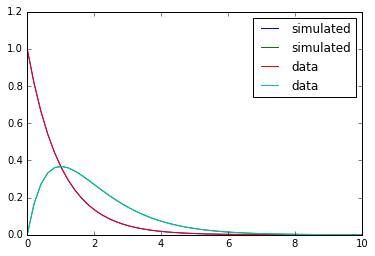

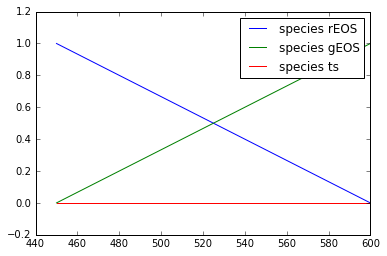

3.89231044421e-19
[ 1.00003963  0.99996038]
[[  1.00000000e+00   3.96232507e-05  -8.08878993e-11]
 [  3.94199341e-30   9.99960376e-01  -3.13494087e-11]]


In [65]:
kf = Kinetics_Fit(connectivity, t, traces,
                  wavelengths = [450,600],
                  species = ['rEOS', 'gEOS','ts'],
                  guess_ks =  np.array([10,4]),)

s = kf.sim_single_abs(t,[1,1],[1,0,0])
m = kf.sim_multi_abs(t,[1,1], [[1,0,0],
                               [0,1,0]])
m2 = kf.sim_stacked_abs(np.array([t,t]).ravel(), *[1,1,1,0,0,0,1,0])

kf.fit_data()
kf.plot_fit()
kf.plot_spectra()
print(kf.final_resids)
print(kf.final_ks)
print(kf.final_abs_factors)

In [19]:
row,col = np.indices(connectivity.shape)

zip(row.ravel(),col.ravel())

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [20]:
np.indices(connectivity.shape)

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

In [21]:
for (i,j),c in np.ndenumerate(connectivity):
    print(i,j,c)

(0, 0, 0)
(0, 1, 1)
(0, 2, 0)
(1, 0, 0)
(1, 1, 0)
(1, 2, 1)
(2, 0, 0)
(2, 1, 0)
(2, 2, 0)


In [22]:
connectivity

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [23]:
abs_factors = np.array([[1,0,0],
                        [0,1,0]])

X0 = [1,0,0]

In [25]:
import lmfit 

def test(t,**kwargs):
    return t*np.array(kwargs.values()).sum()

mod = lmfit.Model(test)
params = lmfit.Parameters()

for (i,j), c in np.ndenumerate(connectivity):
    p_name = 'c_{i}_{j}'.format(i=i,j=j)
    params.add(p_name, c)

for (i,j), a in np.ndenumerate(abs_factors):
    p_name = 'a_{i}_{j}'.format(i=i,j=j)
    params.add(p_name, a)

for i,k in enumerate(ks):
    p_name = 'k_{i}'.format(i=i)
    params.add(p_name, k)

for i,x in enumerate(X0):
    p_name = 'x_{i}'.format(i=i)
    params.add(p_name, x)
    
#mod.fit(35*np.linspace(1,10), t=np.linspace(1,10), a=1,b=2,c=3)

In [67]:
from lmfit import Parameter

class Parameter_plus(Parameter):
    def __init__(self, *params, **kwargs):
        Parameter.__init__(*params,**kwargs)

    def add_array(id,array_params):
        
        self.shape = array_params.shape
        self.id = id
        
        order = len(self.shape)
        
        for ind, a in np.ndenumerate(array_params):
            ind_str = '_'.join(['{}' for i in range(order)]).format(*ind)
            param_name = self.id + ind_str
            self.params.add(param_name, a) 
    
    @property
    def value(self):
        array_params = np.zeros(self.shape)

        for k in self.params:
            str_inds = k.replace(self.id,'').split('_')
            
            #needs to be a tuple for np indexing to work correctly
            ind = tuple([int(i) for i in str_inds])
            array_params[ind] = self.params[k]
            
        return array_params
        
test_abs = np.array([1.,  0.,  0.])
#abs_params = Parameter_Array(test_abs)
#abs_params.value

In [69]:
#{'a':1,'b':2} + {'c':3}

In [70]:
test(10,a=1,b=2,c=3)

60

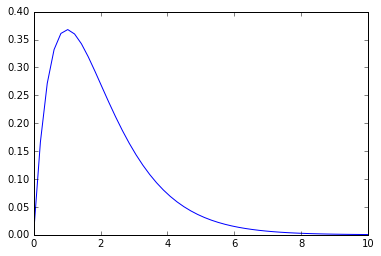

In [71]:
plt.plot(t,m2[len(t):2*len(t)])

In [72]:
data.shape

(301,)

In [84]:
t, measurements = data[:,0], data[:,1]
n = connectivity.shape[0]
n_ks = len(np.nonzero(connectivity))

guess_ks, guess_x0, guess_abs = [], [], []
if not guess_ks:
    guess_ks = np.ones(n_ks)
if not guess_x0:
    guess_x0 = np.zeros(n)
    guess_x0[0] = 1
if not guess_abs:
    guess_abs = np.ones(n)

guess_ks, guess_x0, guess_abs = list(guess_ks), list(guess_x0), list(guess_abs)   
def sim_abs(t, *params):
    """Fitting function"""
    ks = params[:n_ks]
    abs_factor = params[n_ks:n_ks+n]
   
    k=K(ks,connectivity)
    concs = X(t,k,X0)

    spectral_contribs = concs * abs_factor
    spectra = np.sum(spectral_contribs, axis=1)
    return spectra

IndexError: too many indices for array

In [85]:
sc=fit_model(data, connectivity, guess_ks=[.1,.1], guess_abs=[0.5,0.1,0])

NameError: name 'fit_model' is not defined

In [82]:
plt.plot(t, sim_abs(t,*sc[0]))
plt.plot(data[:,0], data[:,1])
plt.show()

print(sc[0], sc[2])

NameError: name 'sim_abs' is not defined

In [80]:
t, measurements = data[:,0], data[:,1:]

IndexError: too many indices for array

In [81]:
#sim_abs(t, *params):

SyntaxError: invalid syntax (<ipython-input-81-e9f9394d1f9e>, line 1)

[[Variables]]
    amp:     10         (init= 10)
    decay:   0.10000000 (init= 0.1)
    shift:   0          (init= 0)
    omega:   3          (init= 3)
[[Correlations]] (unreported correlations are <  0.100)


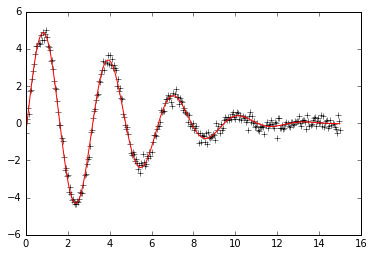

In [78]:
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp'].value
    shift = params['shift'].value
    omega = params['omega'].value
    decay = params['decay'].value

    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('amp',   value= 10,  min=0)
params.add('decay', value= 0.1)
params.add('shift', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value= 3.0)


# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

In [88]:
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp,decay,shift,omega = [p.value for p in params.vec]
    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('vec1', value= 10,  min=0)
params.add('vec2', value= 0.1)
params.add('vec3', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('vec4', value= 3.0)

params.vec = [params['vec1'],params['vec2'],params['vec3'],params['vec4']]

#print(params.vec)
#print(params['vec'].value)
# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

[<Parameter 'vec1', 10, bounds=[0:inf]>, <Parameter 'vec2', 0.1, bounds=[-inf:inf]>, <Parameter 'vec3', 0.0, bounds=[-1.5707963267948966:1.5707963267948966]>, <Parameter 'vec4', 3.0, bounds=[-inf:inf]>]


AttributeError: 'Parameters' object has no attribute 'vec'